In [1]:
%matplotlib inline  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.animation as animation
import matplotlib
from IPython.display import HTML
import plotly.graph_objects as go  #plotly 4.0.0rc1
from plotly.subplots import make_subplots
from matplotlib import pyplot
import plotly.figure_factory as ff

In [2]:
#delta = 0.05



data_contour = pd.read_csv('../contour.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]

#data_contour = data_contour.transpose()
len(data_contour)
data_contour

,bound_0,bound_1,bound_2,bound_3,bound_4,bound_5,bound_6,bound_7,bound_8,bound_9,...,bound_40,bound_41,bound_42,bound_43,bound_44,bound_45,bound_46,bound_47,bound_48,bound_49
0,11.049089,9.240889,7.870621,4.930210,5.382476,5.431503,4.760755,4.099102,4.884774,4.146314,...,4.628628,4.453436,4.744222,4.063432,5.524057,5.351582,6.033641,6.204013,10.748743,10.531269
1,8.819443,7.238473,6.774714,6.031351,4.355415,5.037772,3.925859,3.945793,3.915509,4.095047,...,4.471386,4.570120,4.695617,4.624830,4.492473,5.322534,4.113255,7.356133,8.566864,7.384933
2,6.199357,6.235064,3.906361,5.638159,4.800958,4.476185,3.745289,4.495097,3.787550,3.825326,...,4.588426,4.460796,4.641399,4.657824,5.048385,4.600986,5.779007,5.703550,2.885391,5.248055
3,5.526552,5.241807,5.510904,4.530552,3.989040,3.422617,3.623123,3.976847,3.938578,3.927393,...,4.574201,4.487781,4.753319,4.417510,4.462244,4.513779,4.574184,5.149820,5.429341,2.201854
4,4.109008,4.129302,4.483457,3.780941,3.994767,3.990410,4.045797,3.941965,3.911839,4.051456,...,4.491004,4.463567,4.581198,4.444894,4.418780,4.588855,4.478776,4.948103,4.848564,5.238651
5,4.492334,3.420449,4.058739,3.659246,4.216673,4.074328,3.834522,3.971999,3.916120,3.902340,...,4.490995,4.474497,4.517172,4.590901,4.607080,4.517590,4.630225,4.162414,4.384853,4.096887
6,3.847310,4.286565,4.227248,3.872135,3.907494,3.654055,3.813137,3.849246,3.886809,3.909330,...,4.568264,4.443369,4.476895,4.396678,4.424140,4.523470,4.656087,4.334771,4.725069,4.063508
7,4.129875,4.001952,4.131643,3.177147,3.724503,0.719452,3.827609,3.686728,3.908821,3.905343,...,3.952646,3.684546,1.995833,3.693192,4.435634,4.173524,4.533282,4.688592,4.367041,4.481456
8,3.910649,4.088374,3.341077,3.894051,3.910337,3.793914,2.689195,3.643073,3.030445,3.037835,...,3.028791,4.041524,3.460183,3.684908,3.022506,4.333436,4.306444,1.622178,3.875216,4.406457
9,2.877951,3.716692,3.576382,3.279594,3.383594,3.457721,3.614675,3.335068,3.628465,3.654326,...,3.714101,3.624565,3.683805,3.641598,3.280096,4.137373,3.926889,2.943969,3.886849,2.343030


In [3]:
import matplotlib.cm as cm # matplotlib's color map library
from matplotlib import rc
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

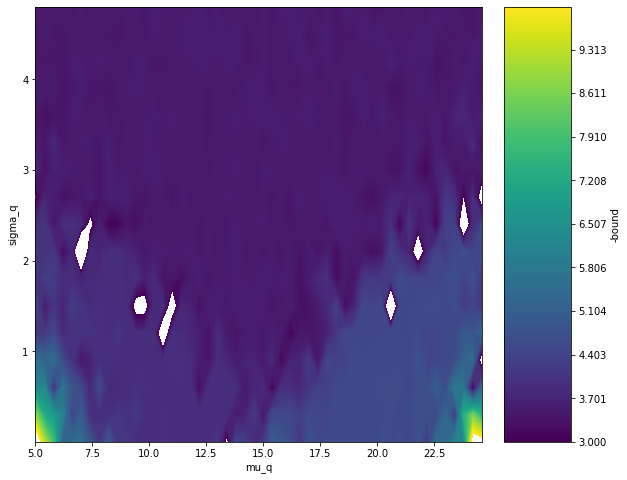

In [4]:
levels = np.linspace(3.0,10, num=500)

delta1 = 0.4
delta2 = 0.3
xlist = np.arange(5, 25, delta1)
ylist = np.arange(0.001, 5, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
#cp2 = axes.contour(x, y, data_pred[idx1].values.tolist(),
 #                      levels=levels, colors=line_colors2, linewidths=linewidth_contour)
line_colors1 = ['black']
axes.set_xlabel('mu_q')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
#axes.clabel(cp2, cp2.levels[::3], inline=True, fontsize=4)
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar


In [5]:
samples0 = list(np.load('../samples_arm_0.npy'))
samples1 = np.load('../samples_arm_1.npy')
samples2 = np.load('../samples_arm_2.npy')


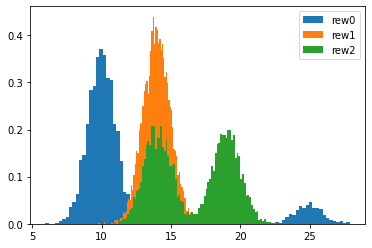

In [6]:
rew0 = list(np.load('../rew_arm_0.npy'))
rew1 = list(np.load('../rew_arm_1.npy'))
rew2 = list(np.load('../rew_arm_2.npy'))

fig = plt.hist(rew0,  density=True, alpha=1, bins=90, label='rew0')
fig = plt.hist(rew1,  density=True, alpha=1, bins=90, label='rew1')
fig = plt.hist(rew2,  density=True, alpha=1, bins=90, label='rew2')

plt.legend(loc='upper right')


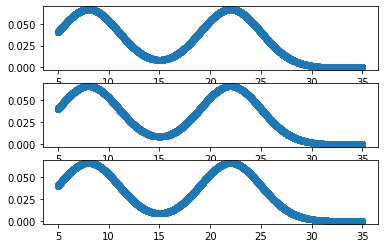

In [7]:
ps0 = list(np.load('../ps_arm_0.npy'))
ps1 = list(np.load('../ps_arm_1.npy'))
ps2 = list(np.load('../ps_arm_2.npy'))

fig, axes = plt.subplots(3)

axes[0].scatter(samples0, ps0)
axes[1].scatter(samples1, ps1)
axes[2].scatter(samples2, ps2)

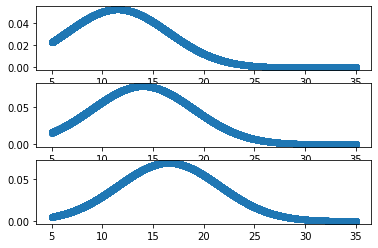

In [8]:
pos0 = list(np.load('../pos_arm_0.npy'))
pos1 = list(np.load('../pos_arm_1.npy'))
pos2 = list(np.load('../pos_arm_2.npy'))

fig, axes = plt.subplots(3)

axes[0].scatter(samples0, pos0)
axes[1].scatter(samples1, pos1)
axes[2].scatter(samples2, pos2)

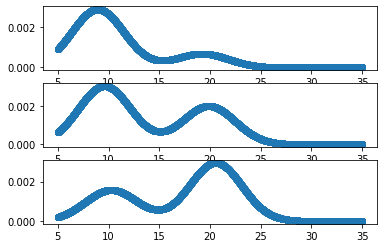

In [9]:
pso0 = list(np.load('../pso_arm_0.npy'))
pso1 = list(np.load('../pso_arm_1.npy'))
pso2 = list(np.load('../pso_arm_2.npy'))

fig, axes = plt.subplots(3)

axes[0].scatter(samples0, pso0)
axes[1].scatter(samples1, pso1)
axes[2].scatter(samples2, pso2)
